In [21]:
#Importation des library
from pylab import *
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from scipy import linalg as LA
import pandas as pd
import numpy as np
import csv
import statistics
import sklearn
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage


In [32]:
df_crime_by_states=pd.read_csv("C:/Users/imadr/OneDrive/Documents/DUT_STID_dev_et_cours/semestre_4/Domaine d'application/partie_1/data_projet/Data_crime_by_states_2004_2019.csv",sep=';')
df_crime_by_states=df_crime_by_states.dropna(axis=1)


In [33]:
df_mean_crime_states=df_crime_by_states.groupby('States').mean()
del df_mean_crime_states['Annee']

# CAH

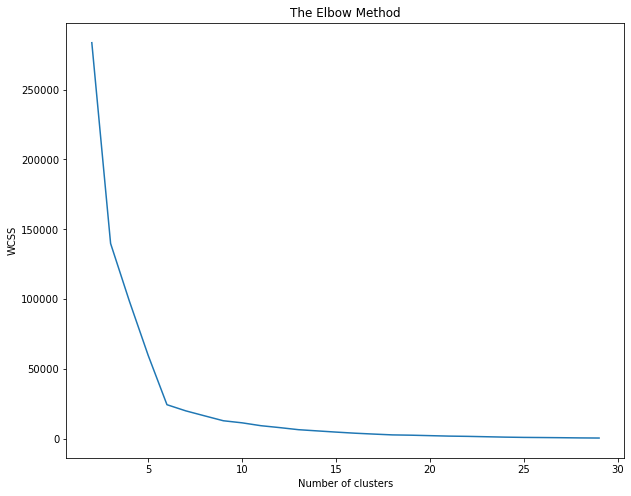

In [34]:
#Choix du cluster en fonction de l'inertie. On peut voir que l'inertie se stabilise à partir de 7 cluster environs donc nous allons constituer 7 groupes.
plt.figure(figsize=(10, 8))
wcss = []
for i in range(2,30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_mean_crime_states)
    wcss.append(kmeans.inertia_) #criterion based on which K-means clustering works
plt.plot(range(2, 30), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [35]:
cah = AgglomerativeClustering(n_clusters=7).fit(df_mean_crime_states)

predicted_lab_1 = cah.labels_
predicted_lab_1

array([1, 1, 4, 1, 5, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 0,
       2, 1, 2, 1, 1, 1, 1, 6, 1, 3, 2, 1, 0, 1, 2, 1, 1, 1, 1, 4, 4, 1,
       1, 4, 0, 1, 1, 1], dtype=int64)

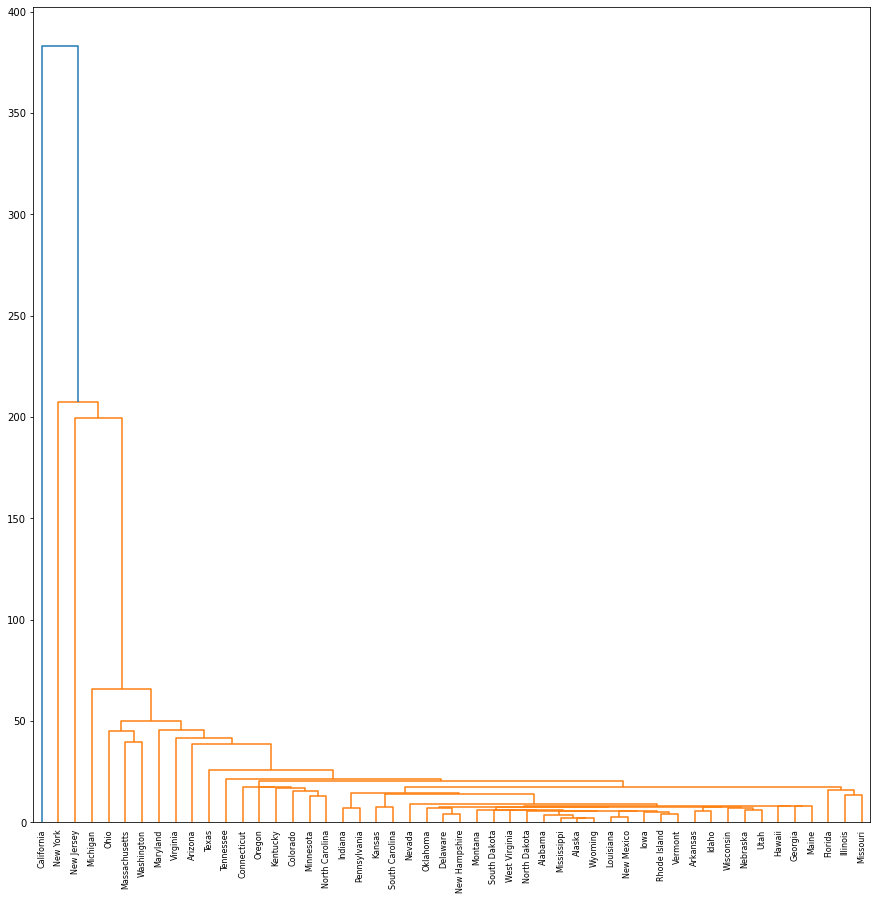

In [36]:
linked = linkage(df_mean_crime_states, 'single')

labelList = range(len(df_mean_crime_states))

plt.figure(figsize=(15, 15))
dendrogram(linked,
            orientation='top',
            labels=df_mean_crime_states.index,
            distance_sort='ascending',
            show_leaf_counts=True)
plt.show()

In [37]:
df_mean_crime_states['CAH_labels']=predicted_lab_1

## K-means

In [38]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(df_mean_crime_states)

kmean_label = kmeans.labels_
kmean_label

array([0, 0, 4, 0, 3, 4, 4, 0, 4, 0, 0, 0, 4, 6, 0, 6, 4, 0, 0, 6, 2, 2,
       4, 0, 6, 0, 0, 6, 0, 1, 0, 5, 4, 0, 2, 0, 4, 6, 0, 6, 0, 4, 4, 0,
       0, 4, 2, 0, 0, 0])

In [39]:
df_mean_crime_states['Kmeans_labels']=kmean_label
df_mean_crime_states.to_csv('Mean_data_crime_by_states_2004_2019_1.csv')